In [1]:
%load_ext autoreload
%autoreload 2
import main

# Steam Game Data Analysis

Lily Wei and Fiona McSherry


## Question

Video games are a significant part of today's society. They act as a form of entertainment, a way for people to interact socially across the globe, a tool for education, and can even be used to create works of art.

Video games have become a diverse and influential form of entertainment, with a large range of different user experiences for people to explore to their own preferences. Because of this huge diversity, it is very difficult to pinpoint what exactly makes a popular and loved game. In this essay, we explore the question: what makes a popular video game?


## Method

To answer this question we used data from the game platform Steam. Steam is a video game digital distribution service and storefront that allows users to purchase games and play them on any compatible device logged into their account.

From Steam we gather data from the list of the top 100 most played games based upon the number of current players ([https://store.steampowered.com/charts/mostplayed](https://store.steampowered.com/charts/mostplayed)). 

In order to build up to an answer to our question of what makes a game popular, we laid out a few guiding/probing questions.

* Does a game even need to be "good" for it to be popular?
* Are more expensive games more popular or are cheaper games more popular?
* Do popular games have any genres in common? 
* Is there a most popular genre?

To answer these questions, we set a metric for popularity as peak concurrent players within the last 24 hours. We chose this as our metric as because what ultimately makes a game popular is how many people play the game. An unpopular game will have hardly any players while a popular game will have many players. We chose to use the peak concurrent players within the last 24 hours instead of current concurrent players as the former number flucuates significantly less. And, it allows each game to put its best foot forward.

From Steam's Most Played, we pulled data about each individual game on the list, including its top 3 genres, price, peak number of players in the last 24 hours, number of reviews, and positivity of reviews.


### Data Retrieval

To obtain this data we utilized the requests python library, the bs4 (Beautiful Soup) library, the pandas library, the Playwright library, and the Regex library. 

Since we are sending Steam a ton of requests to get all our data, we decided that it would be best to store all the retrieved data in a CSV file. This allows us to run our code for data analysis just once as opposed to re-requesting data every time we run our code. Our process of data retrieval is split into two files: `get_data` and `write_csv`.  `get_data` contains all the functions needed to retrieve data points from the game page HTMLs.  `write_csv` is where we run all these functions and store the data into a CSV. 

Below is a more detailed account of how we did our data retrieval.



* Using `Playwright`, we run a headless browser of Steam’s Most Played page. This page as we said above contains a list of the top 100 most played Steam games based on the current concurrent player count. We needed to run a headless browser because part of the website uses JavaScript. A headless browser allows this JavaScript to be rendered as HTML first. 
* From the headless browser, we request the HTML of the Most Played page. This HTML not only contains the links to these games but also contains the game prices and peak concurrent player count within the last 24 hours. 
* We then store the HTML in a Beautiful Soup object and use the `Beautiful Soup` library to break down the HTML into the parts we want. We do this by getting the section of the HTML called ***tbody***, which is the body text. The ***tbody*** element contains all the elements of the table that lists out the data stated above. 

* We get the links for the games by using `Regex` and store it in a list.
* We get the name of the game through the link as the last part of the link is the game name and store it in a list.
* Afterwards, we get the price and the peak players of each game in the same function. To do this, we break up the ***tbody*** HTML into even smaller sections by separating the HTML into its ***tr*** (table row) elements. Each of these sections is stored as a string in a list.
* These elements contain each separate game and its respective price and peak players in different elements. Fortunately, everything within each element was structured the same so we could look for specific characters as opposed to parsing through the entire string.
* Within the ***tr*** element, there are two cases of prices: Free to Play or a $ followed by a number value. Finding this allows us to add each price to a list.
* Again, luckily for us, the last ***td*** (data cell) element in the ***tr*** element is the peak player count. So, we simply just looked for the last ***td*** element and took everything between it.  

* To find the number of reviews and the positivity of them, we examine a Beautiful Soup object of the individual game's html content. Among this, there is a class called `nonresponsive_hidden responsive_reviewdesc` which contains a string of the number of reviews and the percentage of their positivity. The percent of positive reviews always directly follows the character `"-"` and ends with the character `"%"`, so the value between those two characters is the positivity. This percent is always follows by `"of the"` and the number of reviews. So we can retrieve the number of reviews by taking the value between the end of the `"of the"` and before string `"user reviews"`. 

* To get the top 3 genres of each game, we examine the Beautiful Soup object of that game page's html content. The class `glance_tags popular_tags` contains the many genres associated with that game, so we find the occurence of this. However this can be quite a lot so we chose to only look at the 3 most relevant in our analysis. 

* In `write_csv`, we run all of the `get_data` functions and write them into a `Pandas` dataframe. This is then written into a CSV file.

### Visualizations and Processing

Here are the visualizations we will be creating for each of our guiding questions and the processing needed to create it.

**Does a game even need to be "good" for it to be popular?**

The way Steam reviews work is a review can either be a thumbs up, positive, or a thumbs down, negative. Game ratings are computed by dividing the number of positive reviews by the total amount of reviews, generating a percentage. As a result, there are two ways to gauge how "good" a game is: how many positive reviews a game has, and what its game rating is. For our purposes, we will be visualizing both ways. 

Our visualizations for this question will be scatter plots. The x-axis will be either the game rating of a game or the number of positive reviews. The y-axis will be the popularity (Peak Players) of the game. To make it easier to compare the two graphs together, the points will be color coordinated based on the colors of the rainbow. For example, the number 1 most popular game will be purple while the last game on the list will be red. 

To get the number of positive reviews, we compute it by multiplying the game percentage rating by the total amount of reviews of a game.

**Are more expensive games more popular or are cheaper games more popular?**

For this, our visualization will be a bar graph. The prices will be grouped based on if the game is under 10 dollars, between 10 - 20, between 20 - 30, and go all the way up to 50+ dollars. Depending on which price range a game falls in, its peak player count will be added to the number of players playing that price range. This visualization will therefore effectively show us which price range is most popular.

To get these groupings and number of players playing each price point, we create a dictionary with the keys as the price points and the values as the popularity. If a game fell between a certain price point, its peak player count would be added to that key's value.

**Do popular games have any genres in common?**

The visualization for this will be a bar graph. Each bar will represent how many games have the specified genre. 

To get the number of occurences, we created another dictionary where the keys are the genres and the values are the number of occurences. For our purposes, we will only be graphing games that have more than 10 occurences to make sure we are in fact getting the most common genres.

**Is there a most popular genre?**

This visualization will be a bar graph. Each bar will represent the popularity (peak players) of a certain genre. 

To get the popularity of the genres, we created a dictionary where the keys are the genres and the values are the number of players playing it. To find how many players are playing a certain genre, for each game we looked at its top 3 genres and added its player count to the values of each of these 3 genres in the dictionary. For our purposes, we will only be graphing genres with more than 500,000 players playing it, so we are looking at truly the most popular genres.

## Results and Interpretation

The first plot we create compares the game rating to the number of peak players.

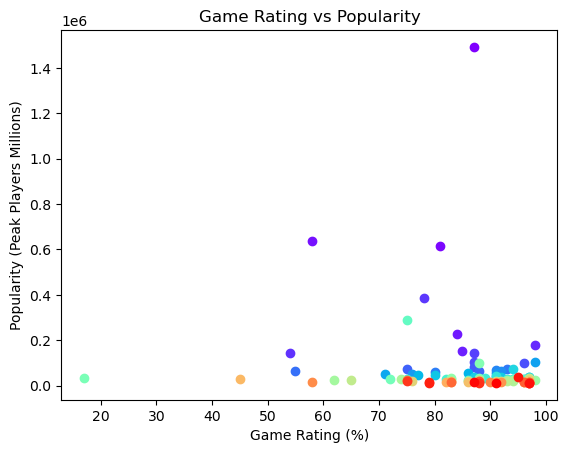

In [2]:
# Plot Game Rating vs Popularity. The colored dots indicate the ranking of the game in Steam's Most Played page. 
# Based on the rainbow, purple dots are higher ranking and red dots are lower ranking
main.create_scatter_plot(main.percent_positive, main.peak_players, "Game Rating vs Popularity", 
                         "Game Rating (%)", "Popularity (Peak Players Millions)")

This graph shows many more data points clustered above 70% positive reviews. This means that generally popular games are "good", since we are analyzing the top 100 games list and a majority of them contain very positive reviews. 

We also see an extreme outlier at the very top right, with over 1.5 million players and around 90% positive reviews, but this plot does not help us pinpoint what makes this game unique. Identifying the game, it is Counter-Strike 2 which was intially released in September of 2023 in comparison to other games on the list that are mostly older (Warframe, for example, was released in 2013). We can conclude from this that it has so many more players because it is a very recent release. 

The next plot compares the number of positive reviews to popularity.

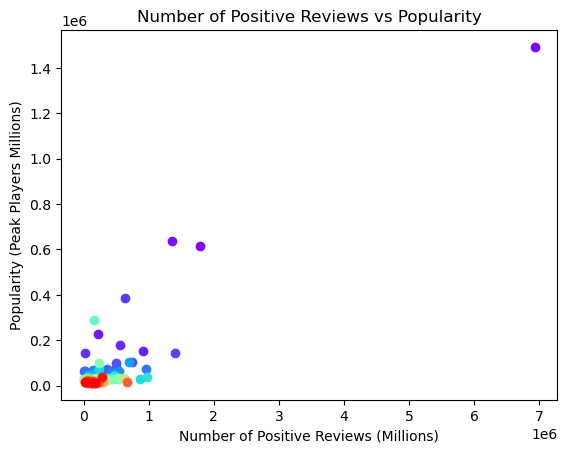

In [3]:
# Plot Number of Positive Reviews vs Popularity. The colored dots indicate the ranking of the game in Steam's Most Played page. 
# Based on the rainbow, purple dots are higher ranking and red dots are lower ranking
main.create_scatter_plot(main.number_of_positive_reviews, main.peak_players, "Number of Positive Reviews vs Popularity", 
                         "Number of Positive Reviews (Millions)", "Popularity (Peak Players Millions)")

In this graph, games with massive amounts of positive reviews have high peak player counts. This lines up with what is to be expected. 

At under the 1 million mark of positive reviews, there is a massive cluster of points. Interestingly, within this cluster of points, the points closer to (0,0) are close to the red side of the rainbow spectrum, indicating that these games are lower ranked on Steam's Most Played Page. 

This graph therefore indicates there is somewhat of an upward trend when it comes to how many positive reviews a game has and how popular it is. And therefore, a positive trend between how "good" a game is and how popular it is.

Upon looking at the two plots side by side, it's interesting to see that on the first plot the red points have higher ratings than some of the purple points. However, the second plot shows that these red points all have significantly less reviews than the purple points by orders of magnitude. This suggests that some of the ratings of the games on Steam are a bit exaggerated from the lack of reviews. 

That being said, we can still conclude that for a game on Steam to be popular, it does generally need to be good.

The next plot compares cost of a games to the number of players active. 

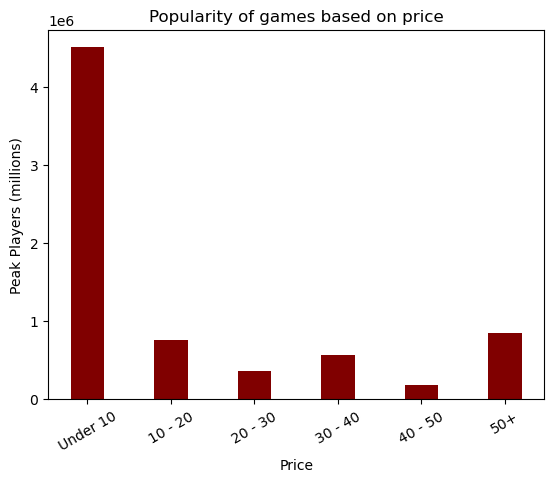

In [4]:
main.create_bar_plot(main.price_points, main.price_points_popularity, "Popularity of games based on price", "Price", 
                     "Peak Players (millions)")

There is a sharp spike in popularity for games under 10 dollars, with over 4 million players on these games. In comparison, the other prices all have below 1 million players. This tells us that the price of a game is extremely impactful on its popularity, with cheaper games gaining more players.  

The next plot shows the number of games that have each genre, cutting out genres that have less than 5 games. 

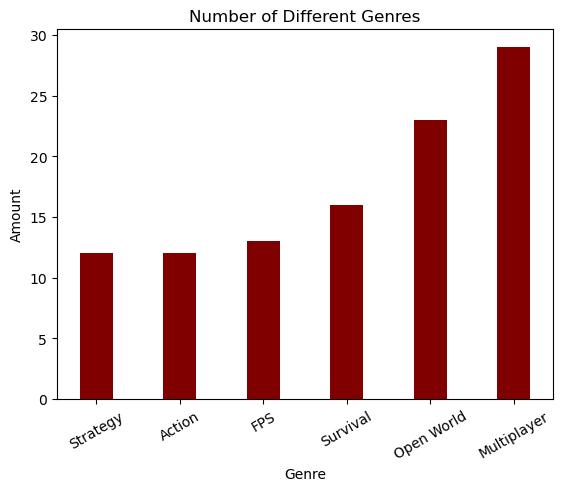

In [8]:
main.create_bar_plot(main.genre_most_common, main.genre_most_common_number, "Number of Different Genres", 
                     "Genre", "Amount")

This plot shows that many of the games on the top 100 list are survival, open world, and multiplayer. This tells us that games with those genres are more likely to become popular.

The next plot shows the genres with the highest number of players.

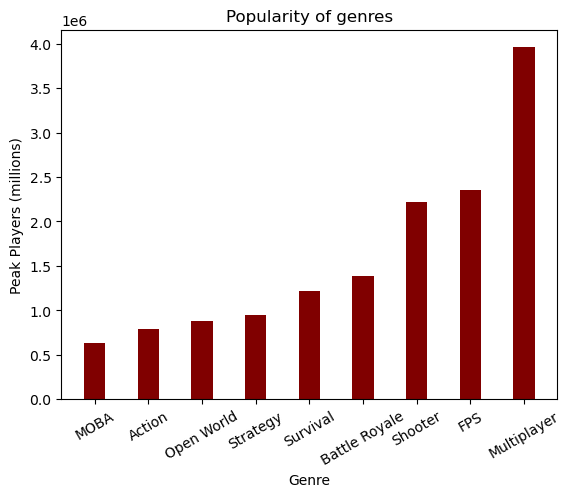

In [7]:
main.create_bar_plot(main.genre_most_popular, main.genre_most_popular_popularity, "Popularity of genres", 
                     "Genre", "Peak Players (millions)")

There is the biggest amount of popularity in Multiplayer games, with Shooter and First Person shooter games also being popular. From our previous plot, we know that the top 100 contains many multiplayer games. Together with this graph we can conclude that multiplayer games commonly become popular, and that they garner more popularity, since the number of players in multiplayer is higher. We can also conclude that although there are more games with open world and survival genres in the list, these games have much less players overall so they aren't extremely popular. Additionally, there is a high number of players in shooter and FPS, even though not many games in the list are that genre. So, the games that become popular with those tags seem to become *very* popular. This tells us that a games genre is important to its popularity, with safe bets to poularity being multiplayer, survival, and open world, and high-risk high-reward genres being shooter and FPS.

## Conclusion

Therefore the main considerations to create a popular game are:

* The game needs to be good. 

* Its price should be lower than $10 in order to garner the most players.

* Its genres should include multiplayer, with survival or open world as a more likely path to popularity, and shooter or first person shooter as a higher risk path to extreme popularity.

In the future, it would be informative to study longevity of popularity in games. We saw that Counter-Strike 2 is largely popular right now because of its recency, but will it retain popularity over time? What makes a game popular and stay popular? 

Another thing to do in the future is incorporate Steam's last 30 days reviews feature. As we noted in the section on correlation of how good a game is vs popularity, there is some exaggeration when it comes to the game ratings. Perhaps using this last 30 days reviews feature will help to mitigate that.

As for ethical considerations, we did use web scrapping to obtain our data. Steam generously allows for web scrapping. We didn't want to overwhelm Steam's servers since we would be running 100 requests to get all our data. So, between each request, we waited 5 seconds. 

For contextual implications, this data analysis could be used to justify creating cash grab games and may discourage creating unique games.

Throughout the project, we ran into a few difficulties. A big difficulty was initially getting all the data we needed. Working out how to use the headless browser was tough and took a solid day or two. Perhaps next time it would be easier to use an API. Another challenge was creating the unit tests as it was difficult to grind them all out in one go. In the next project, it may be easier to write unit tests as we go.